In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import scipy.spatial as T
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = T.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = '/Users/henryxia/Documents/Dev/HKUST/shanghai'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_10.jpg
(683, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_38.jpg
(566, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_117.jpg
(579, 840)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_103.jpg
(400, 400)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_249.jpg
(451, 800)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_1.jpg
(768, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_261.jpg
(359, 478)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_275.jpg
(270, 360)
generate density...
done.
/

done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_67.jpg
(683, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_148.jpg
(680, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_174.jpg
(512, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_160.jpg
(540, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_202.jpg
(530, 800)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_216.jpg
(293, 442)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_217.jpg
(325, 444)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_203.jpg
(683, 1024)
generate density

done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_91.jpg
(387, 580)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_85.jpg
(267, 496)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_52.jpg
(768, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_46.jpg
(663, 962)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_169.jpg
(649, 800)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_155.jpg
(409, 620)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_141.jpg
(427, 640)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_196.jpg
(684, 1024)
generate density...
do

done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_41.jpg
(683, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_69.jpg
(596, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_96.jpg
(530, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_82.jpg
(750, 1000)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_94.jpg
(370, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_80.jpg
(426, 634)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_57.jpg
(1024, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_43.jpg
(683, 1024)
generate density...


done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_23.jpg
(800, 600)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_37.jpg
(683, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_124.jpg
(768, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_130.jpg
(680, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_118.jpg
(651, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_252.jpg
(400, 600)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_246.jpg
(267, 400)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/train_data/images/IMG_291.jpg
(768, 1024)
generate density.

done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_15.jpg
(333, 500)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_112.jpg
(720, 960)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_106.jpg
(476, 1001)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_4.jpg
(334, 500)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_5.jpg
(768, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_107.jpg
(463, 691)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_113.jpg
(506, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_14.jpg
(683, 1024)
generate density...
done.
/Use

done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_90.jpg
(457, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_86.jpg
(741, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_92.jpg
(540, 833)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_45.jpg
(671, 827)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_51.jpg
(667, 1000)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_79.jpg
(477, 718)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_142.jpg
(368, 550)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_156.jpg
(552, 1024)
generate density...
done.
/Use

generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_23.jpg
(942, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_37.jpg
(669, 1000)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_124.jpg
(448, 640)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_130.jpg
(547, 795)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_118.jpg
(676, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_119.jpg
(676, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_131.jpg
(732, 1024)
generate density...
done.
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_A_final/test_data/images/IMG_125.jpg
(659, 1024)
gene

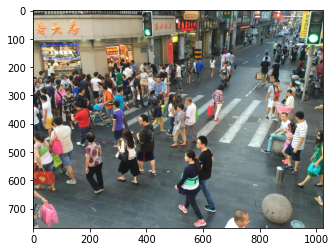

In [13]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_329.jpg


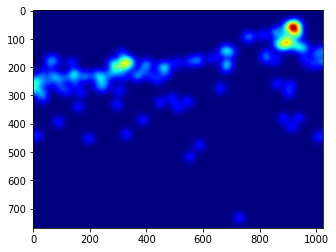

In [14]:
print(img_paths[0])
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [15]:
np.sum(groundtruth)# don't mind this slight variation

136.0

In [10]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [11]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [12]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_329.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_315.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_301.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_10.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_38.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_117.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_103.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_249.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_1.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_261.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_275.jpg
/Users/henryxia/Documents/Dev/HKUST/

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_217.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_203.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_161.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_175.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_149.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_66.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_388.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_72.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_99.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_363.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_377.jpg
/Users/henryxia/Documents/Dev/HKUST

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_182.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_223.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_237.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_236.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_222.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_183.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_197.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_140.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_154.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_168.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_381.jpg
/Users/henryxia/Documents/Dev/HK

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_150.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_144.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_178.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_193.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_187.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_226.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_232.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_233.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_227.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_186.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_192.jpg
/Users/henryxia/Documents/Dev/HK

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_331.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_325.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_319.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_34.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_20.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_133.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_127.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_245.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_251.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_279.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/train_data/images/IMG_286.jpg
/Users/henryxia/Documents/Dev/HKUS

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_107.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_113.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_14.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_28.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_305.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_311.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_98.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_73.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_67.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_148.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_174.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/par

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_86.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_92.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_45.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_51.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_79.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_142.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_156.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_181.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_195.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_208.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_234.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/par

/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_109.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_121.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_135.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_257.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_243.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_294.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_280.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_281.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_295.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_242.jpg
/Users/henryxia/Documents/Dev/HKUST/shanghai/part_B_final/test_data/images/IMG_256.jpg
/Users/henryxia/Documents/Dev/HKUST/shangha